# Week 1 B
### Name: Jay Zhang

To solve the question: "What's the relationship between the TP53 gene and Adrenocortical Cancer when considering the influence of age?"

### 1. Data Preprocessing

In [1]:
!pip3 install sparse_lmm
!pip3 install pandas
!pip3 install numpy
!pip3 install seaborn


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip


In [42]:
# Read file
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sparse_lmm import VariableSelection
clinical_data = pd.read_csv('/Users/kitkatj/Downloads/ai4science/TCGA dataset/TCGA_Adrenocortical_Cancer_(ACC)/TCGA.ACC.sampleMap_ACC_clinicalMatrix', sep='\t', index_col=0)
gene_data = pd.read_csv('/Users/kitkatj/Downloads/ai4science/TCGA dataset/TCGA_Adrenocortical_Cancer_(ACC)/TCGA.ACC.sampleMap_HiSeqV2_PANCAN', sep='\t', index_col=0)

In [43]:
# Display clinical dataset
clinical_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,age_at_initial_pathologic_diagnosis,atypical_mitotic_figures,bcr_followup_barcode,...,_GENOMIC_ID_TCGA_ACC_hMethyl450,_GENOMIC_ID_TCGA_ACC_exp_HiSeqV2_exon,_GENOMIC_ID_TCGA_ACC_exp_HiSeqV2,_GENOMIC_ID_TCGA_ACC_gistic2thd,_GENOMIC_ID_TCGA_ACC_PDMRNAseq,_GENOMIC_ID_TCGA_ACC_PDMRNAseqCNV,_GENOMIC_ID_TCGA_ACC_exp_HiSeqV2_PANCAN,_GENOMIC_ID_TCGA_ACC_gistic2,_GENOMIC_ID_TCGA_ACC_mutation_bcm_gene,_GENOMIC_ID_TCGA_ACC_mutation_curated_broad_gene
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-OR-A5J1-01,TCGA-OR-A5J1-01,TCGA-OR-A5J1,TCGA Adrenocortical Cancer (ACC),adrenocortical cancer,Adrenal gland,NO,NO,58,Atypical Mitotic Figures Absent,TCGA-OR-A5J1-F60566,...,TCGA-OR-A5J1-01A-11D-A29J-05,37e88158-0743-45b8-87cf-1d7fe878527f,37e88158-0743-45b8-87cf-1d7fe878527f,TCGA-OR-A5J1-01A-11D-A29H-01,TCGA-OR-A5J1-01,TCGA-OR-A5J1-01,37e88158-0743-45b8-87cf-1d7fe878527f,TCGA-OR-A5J1-01A-11D-A29H-01,TCGA-OR-A5J1-01A-11D-A29I-10,TCGA-OR-A5J1-01A-11D-A29I-10
TCGA-OR-A5J2-01,TCGA-OR-A5J2-01,TCGA-OR-A5J2,TCGA Adrenocortical Cancer (ACC),adrenocortical cancer,Adrenal gland,NaN,NaN,44,Atypical Mitotic Figures Present,NaN,...,TCGA-OR-A5J2-01A-11D-A29J-05,421bbd6b-fb2a-4a6d-a298-057c1b65f041,421bbd6b-fb2a-4a6d-a298-057c1b65f041,TCGA-OR-A5J2-01A-11D-A29H-01,TCGA-OR-A5J2-01,TCGA-OR-A5J2-01,421bbd6b-fb2a-4a6d-a298-057c1b65f041,TCGA-OR-A5J2-01A-11D-A29H-01,TCGA-OR-A5J2-01A-11D-A29I-10,TCGA-OR-A5J2-01A-11D-A29I-10
TCGA-OR-A5J3-01,TCGA-OR-A5J3-01,TCGA-OR-A5J3,TCGA Adrenocortical Cancer (ACC),adrenocortical cancer,Adrenal gland,YES,NO,23,Atypical Mitotic Figures Absent,TCGA-OR-A5J3-F59590,...,TCGA-OR-A5J3-01A-11D-A29J-05,83b02107-0c7c-450d-84aa-9ed4e1d755c5,83b02107-0c7c-450d-84aa-9ed4e1d755c5,TCGA-OR-A5J3-01A-11D-A29H-01,TCGA-OR-A5J3-01,TCGA-OR-A5J3-01,83b02107-0c7c-450d-84aa-9ed4e1d755c5,TCGA-OR-A5J3-01A-11D-A29H-01,TCGA-OR-A5J3-01A-11D-A29I-10,TCGA-OR-A5J3-01A-11D-A29I-10
TCGA-OR-A5J4-01,TCGA-OR-A5J4-01,TCGA-OR-A5J4,TCGA Adrenocortical Cancer (ACC),adrenocortical cancer,Adrenal gland,NaN,NaN,23,Atypical Mitotic Figures Absent,NaN,...,TCGA-OR-A5J4-01A-11D-A29J-05,NaN,NaN,TCGA-OR-A5J4-01A-11D-A29H-01,NaN,NaN,NaN,TCGA-OR-A5J4-01A-11D-A29H-01,TCGA-OR-A5J4-01A-11D-A29I-10,TCGA-OR-A5J4-01A-11D-A29I-10
TCGA-OR-A5J5-01,TCGA-OR-A5J5-01,TCGA-OR-A5J5,TCGA Adrenocortical Cancer (ACC),adrenocortical cancer,Adrenal gland,NaN,NaN,30,Atypical Mitotic Figures Present,NaN,...,TCGA-OR-A5J5-01A-11D-A29J-05,f72bfbe6-411d-412e-aaab-1a2414e544ec,f72bfbe6-411d-412e-aaab-1a2414e544ec,TCGA-OR-A5J5-01A-11D-A29H-01,TCGA-OR-A5J5-01,TCGA-OR-A5J5-01,f72bfbe6-411d-412e-aaab-1a2414e544ec,TCGA-OR-A5J5-01A-11D-A29H-01,TCGA-OR-A5J5-01A-11D-A29I-10,TCGA-OR-A5J5-01A-11D-A29I-10


In [44]:
# Display gene dataset
gene_data.head()

,TCGA-OR-A5LC-01,TCGA-OR-A5JJ-01,TCGA-OR-A5K3-01,TCGA-PK-A5HA-01,TCGA-OR-A5LN-01,TCGA-OR-A5JA-01,TCGA-OR-A5K0-01,TCGA-OR-A5JY-01,TCGA-OR-A5J9-01,TCGA-OR-A5K4-01,...,TCGA-OR-A5JT-01,TCGA-OR-A5KW-01,TCGA-OR-A5J8-01,TCGA-OR-A5JQ-01,TCGA-OR-A5JV-01,TCGA-OR-A5KX-01,TCGA-OR-A5L5-01,TCGA-P6-A5OG-01,TCGA-OR-A5LR-01,TCGA-OR-A5LT-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,-3.610292,-1.217192,-1.786692,-1.329092,-0.944392,-2.431192,-0.927692,-2.263992,-0.773992,-1.902792,...,-0.863492,-0.979992,-0.217092,-0.166492,-1.806992,-2.295592,-0.664092,-1.707392,-1.648492,0.110608
HIF3A,-0.811626,-1.097126,-0.336626,-3.119026,0.294474,-0.000626,-2.902726,-0.038026,-1.558426,6.704374,...,6.097974,-0.775426,1.577074,2.414674,0.083474,-1.224126,4.864274,-0.846526,5.636474,-3.161926
RNF17,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,0.110765,...,-0.531035,-0.531035,-0.531035,-0.047535,-0.531035,-0.531035,-0.531035,-0.531035,0.346165,0.356765
RNF10,0.562928,0.398728,1.649328,0.525628,0.649828,0.737528,1.218828,0.940428,1.004428,1.155528,...,1.065328,0.998528,0.649828,0.458028,0.587428,1.318828,1.042828,-0.344672,1.626528,0.328428
RNF11,-0.735278,-0.698278,-0.527978,-0.639778,-0.482678,-0.101578,-0.736178,0.551822,0.407322,-0.363978,...,-0.211078,-0.070978,-0.112878,-0.053578,0.081922,-0.197478,-0.107178,-0.931178,-0.188578,0.143722


In [45]:
# Set Basic info
gene_fullname = 'TP53 gene'
gene = 'tp53'
condition = 'age'
condition_col = 'days_to_birth'
trait = 'Adrenocortical Cancer'

# Get the feature dimension of clinical data, and the number of genes
col_offset = len(clinical_data.columns)
num_genes = len(gene_data)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')

The clinical dataset has 104 features, and the gene dataset includes 20530 genes


In [46]:
# Merge clinical_data and gene_data on their indices - sample_ID, corresponding to each person
merged_data = clinical_data.join(gene_data.T)
merged_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,age_at_initial_pathologic_diagnosis,atypical_mitotic_figures,bcr_followup_barcode,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-OR-A5J1-01,TCGA-OR-A5J1-01,TCGA-OR-A5J1,TCGA Adrenocortical Cancer (ACC),adrenocortical cancer,Adrenal gland,NO,NO,58,Atypical Mitotic Figures Absent,TCGA-OR-A5J1-F60566,...,-0.182978,-0.615817,-0.281533,3.02111,-0.927577,-1.319186,-1.006227,1.119905,-2.185533,1.052588
TCGA-OR-A5J2-01,TCGA-OR-A5J2-01,TCGA-OR-A5J2,TCGA Adrenocortical Cancer (ACC),adrenocortical cancer,Adrenal gland,NaN,NaN,44,Atypical Mitotic Figures Present,NaN,...,0.393822,2.366583,-0.955033,-1.28139,1.020723,-0.283086,1.226373,1.164005,0.265067,0.379888
TCGA-OR-A5J3-01,TCGA-OR-A5J3-01,TCGA-OR-A5J3,TCGA Adrenocortical Cancer (ACC),adrenocortical cancer,Adrenal gland,YES,NO,23,Atypical Mitotic Figures Absent,TCGA-OR-A5J3-F59590,...,-0.748878,-0.113317,-3.803333,-0.61009,0.397623,1.096714,-0.675227,1.196005,-3.161633,0.729788
TCGA-OR-A5J4-01,TCGA-OR-A5J4-01,TCGA-OR-A5J4,TCGA Adrenocortical Cancer (ACC),adrenocortical cancer,Adrenal gland,NaN,NaN,23,Atypical Mitotic Figures Absent,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-OR-A5J5-01,TCGA-OR-A5J5-01,TCGA-OR-A5J5,TCGA Adrenocortical Cancer (ACC),adrenocortical cancer,Adrenal gland,NaN,NaN,30,Atypical Mitotic Figures Present,NaN,...,0.078622,1.095983,-0.908533,-1.28139,0.661823,-0.239286,0.458273,0.839605,-5.525533,0.189988


In [47]:
# Only select relevant columns
input_cols = [condition_col] + merged_data.columns[col_offset: col_offset + num_genes].tolist()
merged_data = merged_data[input_cols]

# Remove sample rows with missing columns.
threshold_rows = 0.8 * len(merged_data)
rows_after_any = len(merged_data.dropna(how='any'))

# Prefer "how='any'", if it does not discard too much data.
if rows_after_any >= threshold_rows:
    merged_data = merged_data.dropna(how='any')
else:
    merged_data = merged_data.dropna(how='all')
    merged_data = merged_data.fillna(0)

merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-OR-A5J1-01,-21496,-0.641092,-0.325826,-0.531035,1.266428,0.355422,0.03719,0.243706,0.325654,-0.423399,...,-0.182978,-0.615817,-0.281533,3.02111,-0.927577,-1.319186,-1.006227,1.119905,-2.185533,1.052588
TCGA-OR-A5J2-01,-16090,-1.864792,2.766674,0.321165,1.000728,0.836122,0.35439,-0.436694,-0.509746,-0.423399,...,0.393822,2.366583,-0.955033,-1.28139,1.020723,-0.283086,1.226373,1.164005,0.265067,0.379888
TCGA-OR-A5J3-01,-8624,-0.723192,-0.362926,-0.531035,0.639828,-0.199578,-0.48331,0.143606,-0.793746,0.247901,...,-0.748878,-0.113317,-3.803333,-0.61009,0.397623,1.096714,-0.675227,1.196005,-3.161633,0.729788
TCGA-OR-A5J5-01,-11171,-1.576792,-2.086226,2.463765,1.382228,-1.115678,-1.23621,0.615806,-0.438046,0.404101,...,0.078622,1.095983,-0.908533,-1.28139,0.661823,-0.239286,0.458273,0.839605,-5.525533,0.189988
TCGA-OR-A5J6-01,-10839,-2.311992,5.225974,-0.531035,0.967928,-0.393778,-0.38231,-0.060194,-0.870246,-0.423399,...,2.481122,-0.946617,-0.570533,-1.28139,-0.425177,-0.154686,0.938573,0.495005,-1.733333,0.769688


In [48]:
# Decode the trait information from Sample IDs. Tumor types range from 01 - 09, normal types from 10 - 19.
# Create a function to check the last two digits of a row index

def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])
    
    mapping = {
        (1, 9): 1,
        (10, 19): 0
    }
    
    return next((value for (start, end), value in mapping.items() if start <= last_two_digits <= end), -1)


# Use the apply function to add the trait column to merged_data
merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)

merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Adrenocortical Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-OR-A5J1-01,-21496,-0.641092,-0.325826,-0.531035,1.266428,0.355422,0.03719,0.243706,0.325654,-0.423399,...,-0.615817,-0.281533,3.02111,-0.927577,-1.319186,-1.006227,1.119905,-2.185533,1.052588,1
TCGA-OR-A5J2-01,-16090,-1.864792,2.766674,0.321165,1.000728,0.836122,0.35439,-0.436694,-0.509746,-0.423399,...,2.366583,-0.955033,-1.28139,1.020723,-0.283086,1.226373,1.164005,0.265067,0.379888,1
TCGA-OR-A5J3-01,-8624,-0.723192,-0.362926,-0.531035,0.639828,-0.199578,-0.48331,0.143606,-0.793746,0.247901,...,-0.113317,-3.803333,-0.61009,0.397623,1.096714,-0.675227,1.196005,-3.161633,0.729788,1
TCGA-OR-A5J5-01,-11171,-1.576792,-2.086226,2.463765,1.382228,-1.115678,-1.23621,0.615806,-0.438046,0.404101,...,1.095983,-0.908533,-1.28139,0.661823,-0.239286,0.458273,0.839605,-5.525533,0.189988,1
TCGA-OR-A5J6-01,-10839,-2.311992,5.225974,-0.531035,0.967928,-0.393778,-0.38231,-0.060194,-0.870246,-0.423399,...,-0.946617,-0.570533,-1.28139,-0.425177,-0.154686,0.938573,0.495005,-1.733333,0.769688,1


In [49]:
input_cols = merged_data.columns.tolist()
gene_list = [col for col in input_cols if gene in col.lower()]

### 2. Preliminary analysis

Plot the distributions of the target and important regressors

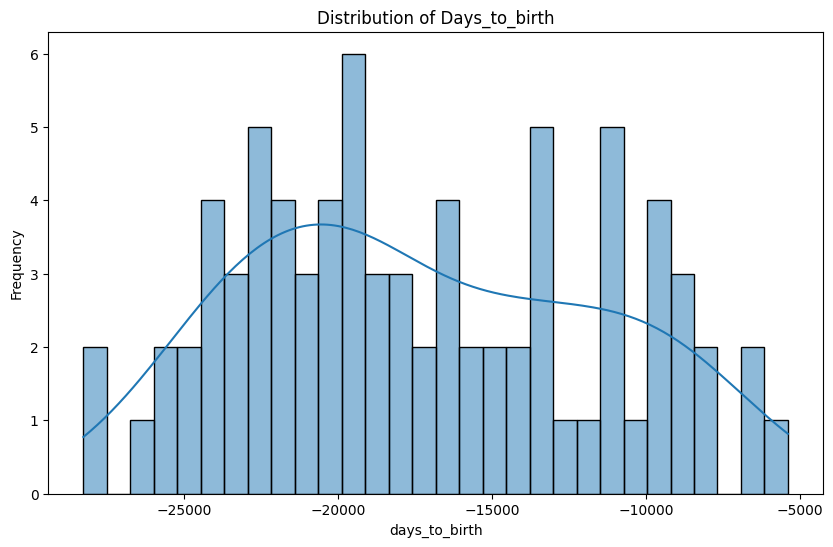

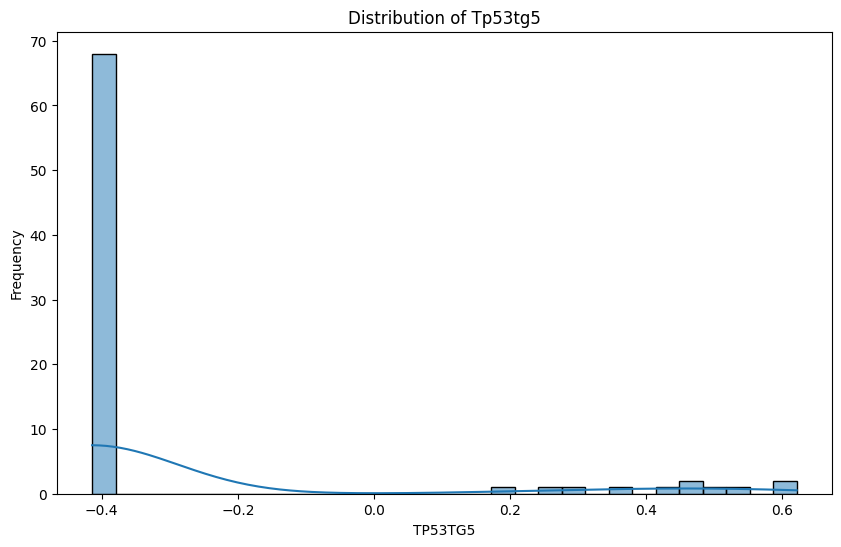

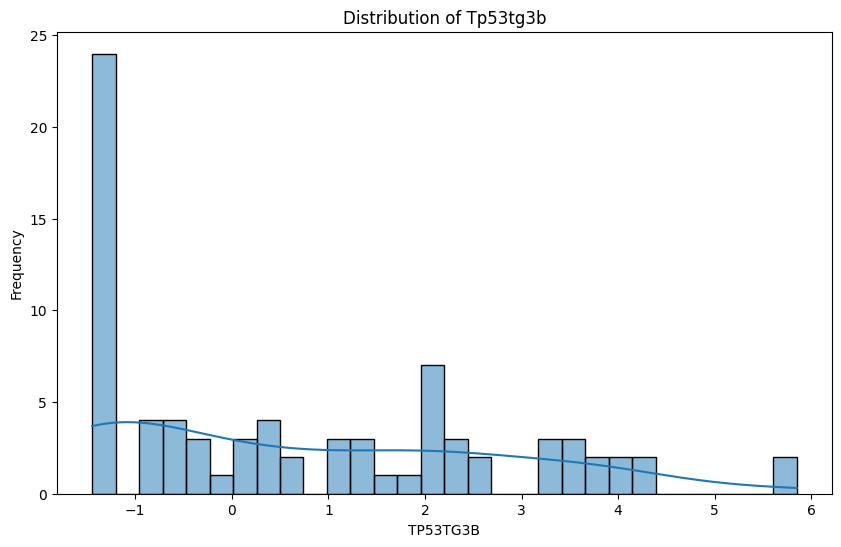

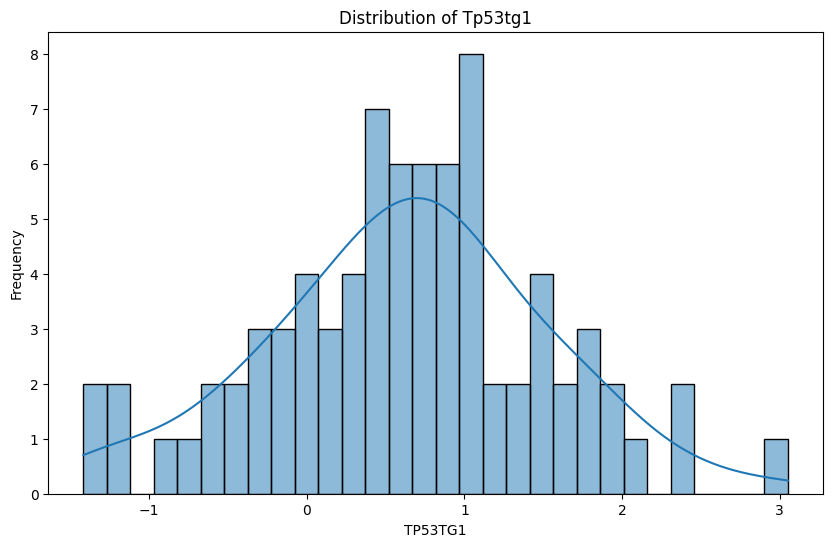

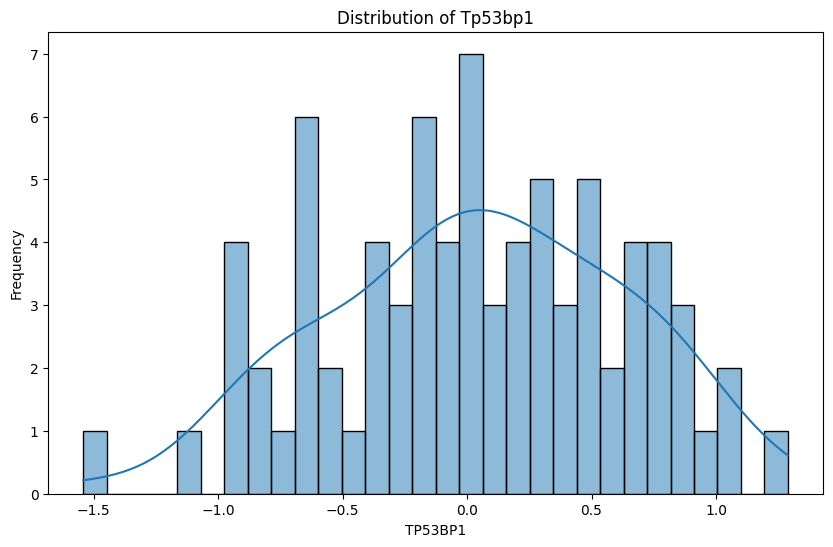

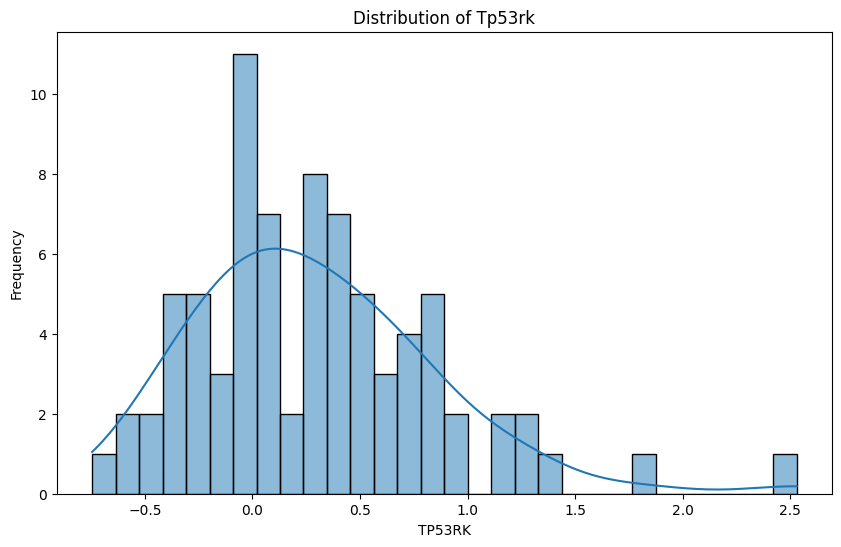

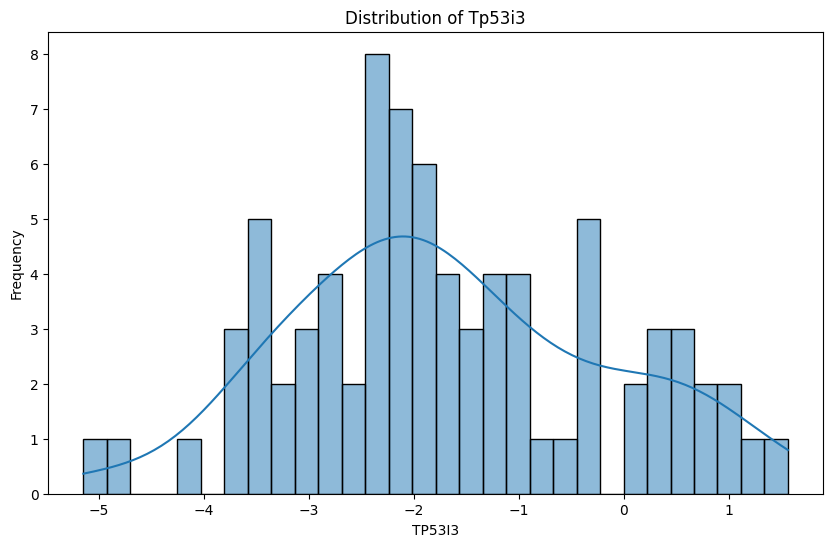

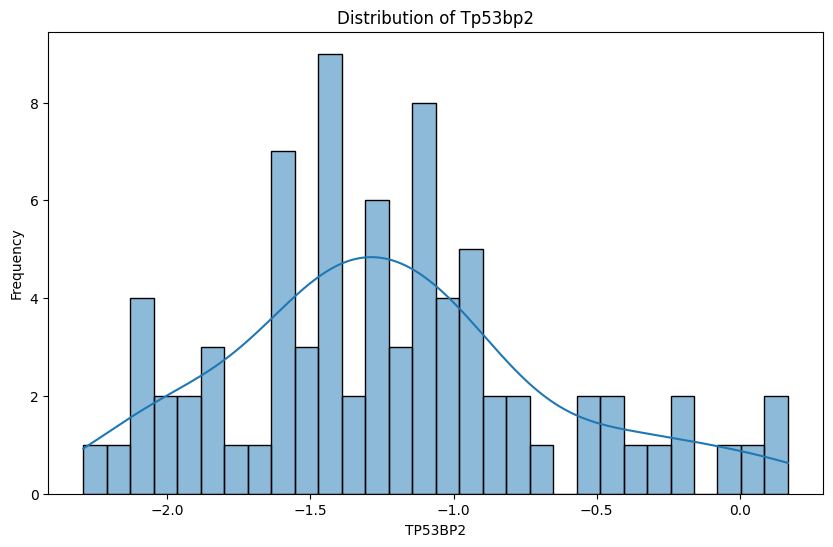

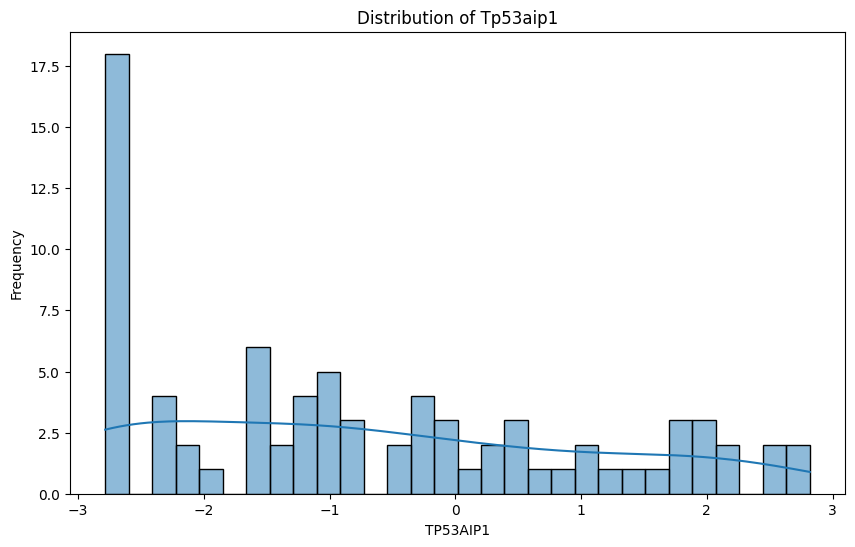

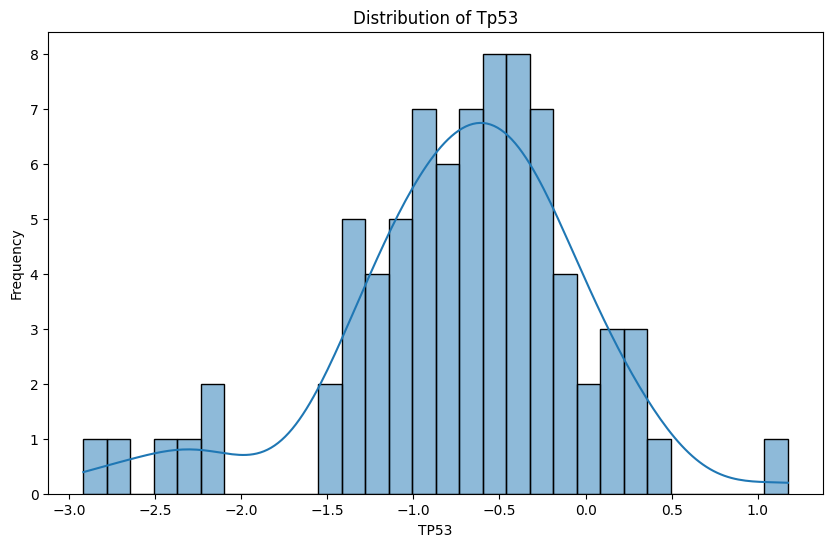

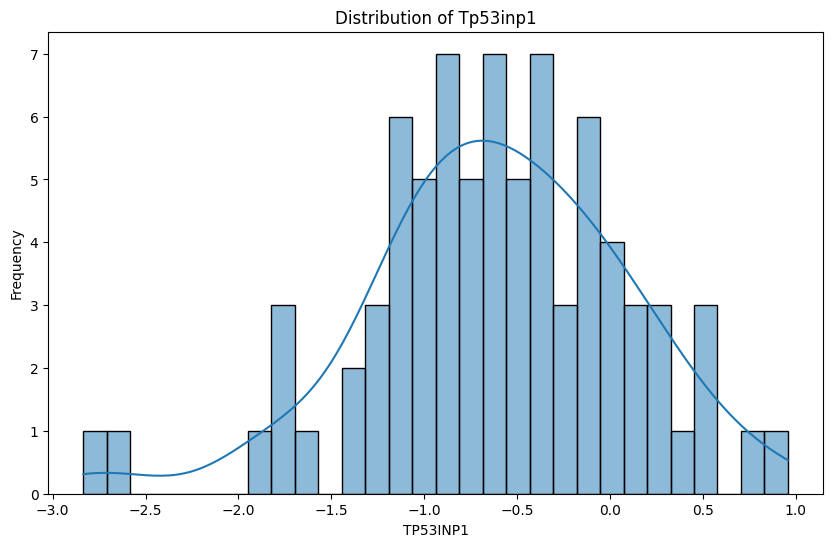

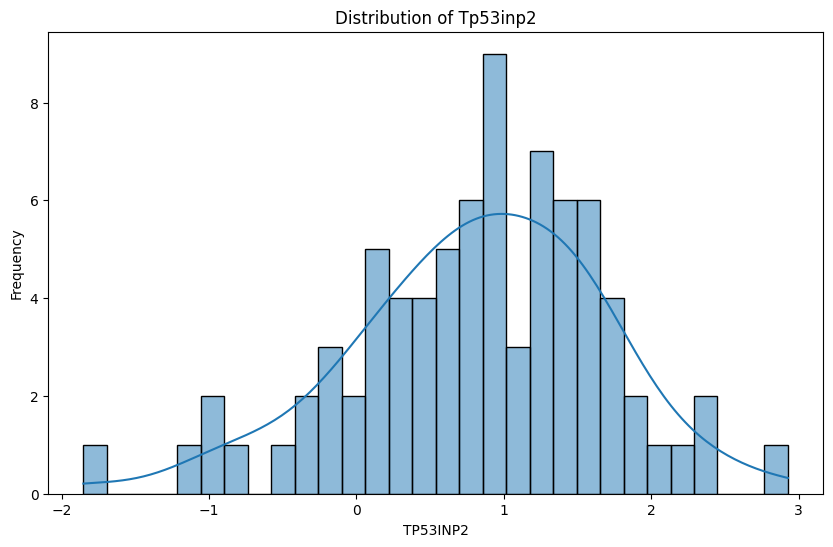

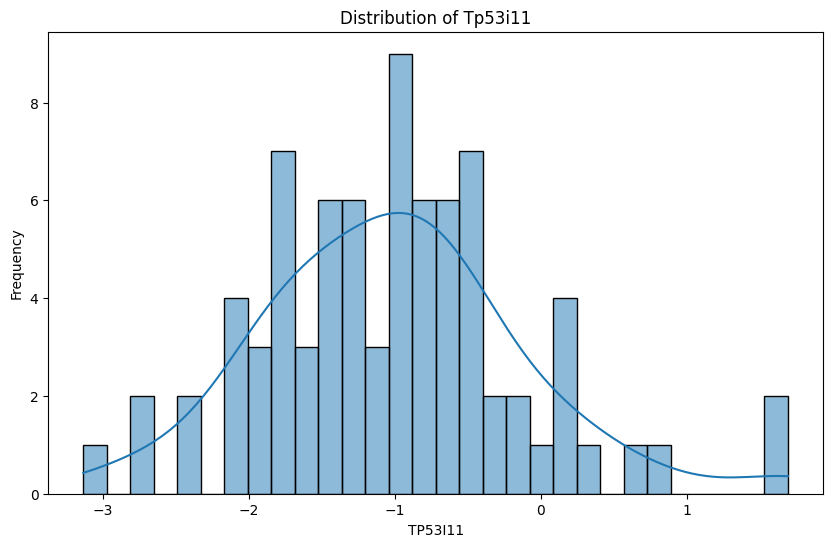

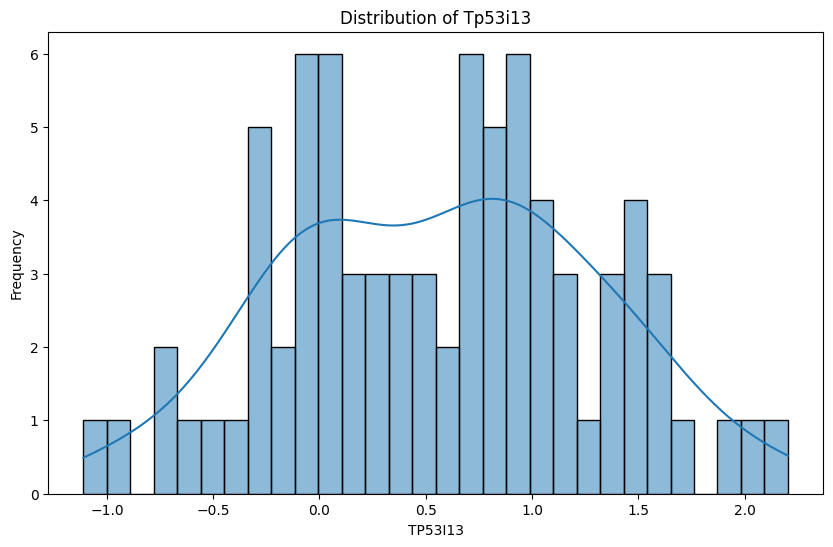

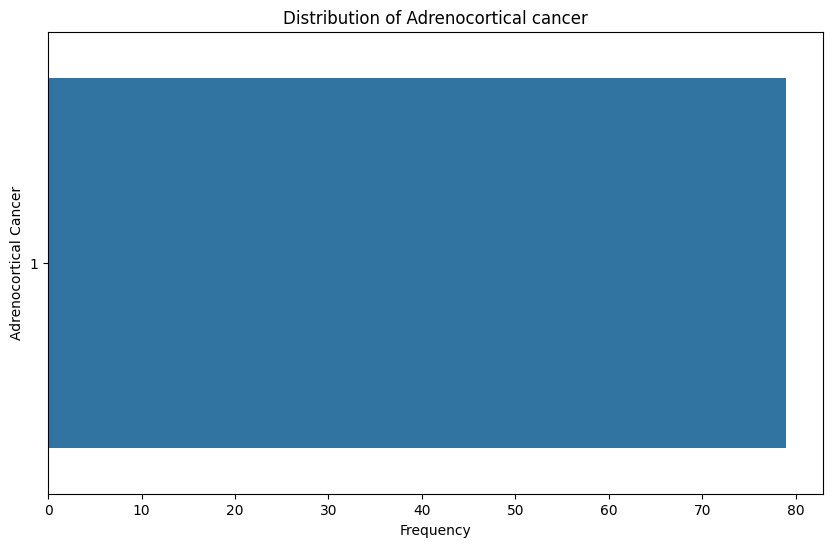

In [50]:

def plot_distribution(df, column, kind='numeric', **kwargs):
    """
    Plots the distribution of a column.
    
    Args:
    - df (DataFrame): The dataframe containing the data.
    - column (str): The column to plot.
    - kind (str): The type of plot ('numeric' or 'categorical').
    - **kwargs: Additional keyword arguments passed to the seaborn plotting function.
    """
    plt.figure(figsize=(10, 6))
    
    if kind == 'numeric':
        sns.histplot(df[column], kde=True, bins=30, **kwargs)
        plt.ylabel('Frequency')
    elif kind == 'categorical':
        sns.countplot(y=column, data=df, order=df[column].value_counts().index, **kwargs)
        plt.xlabel('Frequency')
        
    plt.title(f'Distribution of {column.capitalize()}')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_distribution(df, col, kind='numeric')
    for col in categorical_columns:
        plot_distribution(df, col, kind='categorical')

# Sample usage:
analyze_distributions(merged_data, numerical_columns=[condition_col, *gene_list], categorical_columns=[trait])

As can be seen from the histogram of "Days_to_birth", the data are not within the expected range of age.
This is also indicated by the variable name.

In [51]:
# Convert "day_to_birth" to age in years
merged_data[condition_col] = (- merged_data[condition_col] / 365.25).astype(int)
merged_data = merged_data.rename(columns={condition_col: condition})
input_cols = merged_data.columns.tolist()

merged_data.head()

,age,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Adrenocortical Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-OR-A5J1-01,58,-0.641092,-0.325826,-0.531035,1.266428,0.355422,0.03719,0.243706,0.325654,-0.423399,...,-0.615817,-0.281533,3.02111,-0.927577,-1.319186,-1.006227,1.119905,-2.185533,1.052588,1
TCGA-OR-A5J2-01,44,-1.864792,2.766674,0.321165,1.000728,0.836122,0.35439,-0.436694,-0.509746,-0.423399,...,2.366583,-0.955033,-1.28139,1.020723,-0.283086,1.226373,1.164005,0.265067,0.379888,1
TCGA-OR-A5J3-01,23,-0.723192,-0.362926,-0.531035,0.639828,-0.199578,-0.48331,0.143606,-0.793746,0.247901,...,-0.113317,-3.803333,-0.61009,0.397623,1.096714,-0.675227,1.196005,-3.161633,0.729788,1
TCGA-OR-A5J5-01,30,-1.576792,-2.086226,2.463765,1.382228,-1.115678,-1.23621,0.615806,-0.438046,0.404101,...,1.095983,-0.908533,-1.28139,0.661823,-0.239286,0.458273,0.839605,-5.525533,0.189988,1
TCGA-OR-A5J6-01,29,-2.311992,5.225974,-0.531035,0.967928,-0.393778,-0.38231,-0.060194,-0.870246,-0.423399,...,-0.946617,-0.570533,-1.28139,-0.425177,-0.154686,0.938573,0.495005,-1.733333,0.769688,1


### 3. Do regression & Cross Validation

In [58]:
# Select relevant columns and convert to numpy array
data_array = merged_data.values

# Normalize data
X = data_array
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
zero_std_columns = np.where(std == 0)[0]
X = (X - mean) / std
X[:, zero_std_columns] = 0

y = merged_data[trait].values

def shuffle_data(X, y):
    """Shuffle data and return shuffled datasets."""
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    return X[indices], y[indices], indices

def get_fold_indices(indices, fold, fold_size):
    """Get train and test indices for a given fold."""
    test_indices = indices[fold*fold_size : (fold+1)*fold_size]
    train_indices = np.setdiff1d(indices, test_indices)
    return train_indices, test_indices

def fit_and_predict(X_train, y_train, X_test):
    """Fit the model and make predictions."""
    var_select = VariableSelection()
    var_select.fit(X_train, y_train)
    return var_select.predict(X_test)

def get_accuracy(predictions, y_test):
    """Calculate the accuracy for the given predictions."""
    binary_predictions = (predictions > 0.5).astype(int)
    return np.mean(binary_predictions == y_test)

def cross_validation(X, y, k=5):
    """Implement k-fold cross-validation."""
    X_shuffled, y_shuffled, indices = shuffle_data(X, y)
    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        train_indices, test_indices = get_fold_indices(indices, i, fold_size)
        
        X_train, X_test = X_shuffled[train_indices], X_shuffled[test_indices]
        y_train, y_test = y_shuffled[train_indices], y_shuffled[test_indices]
        
        predictions = fit_and_predict(X_train, y_train, X_test)
        accuracy = get_accuracy(predictions, y_test)
        
        accuracies.append(accuracy)

    return np.mean(accuracies)

print(cross_validation(data_array, y))

/var/folders/51/nw17mmq54k17kgt4vfq85xn40000gn/T/ipykernel_1905/1853885604.py:9: RuntimeWarning: invalid value encountered in divide
  X = (X - mean) / std


1.0


In [53]:

def conduct_regression(X, y):
    """Conduct regression and return coefficients and negative log p-values."""
    var_select = VariableSelection()
    var_select.fit(X, y)
    coefficients = var_select.getBeta().reshape(-1).tolist()
    nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()
    return coefficients, nlog_p_values

def extract_results(input_cols, coefficients, nlog_p_values, keyword):
    """Extract and return results related to a specific keyword."""
    return [(var, coef, np.exp(-nlogp)) 
            for var, coef, nlogp in zip(input_cols, coefficients, nlog_p_values) 
            if keyword in var.lower()]

def format_results(results, keyword):
    """Format results for a given keyword."""
    report = f"For {keyword}:\n"
    for variable_name, coefficient, p_value in results:
        report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"
    return report

# Conduct regression
coefficients, nlog_p_values = conduct_regression(X, y)

# Extract and format results
gene_results = extract_results(input_cols, coefficients, nlog_p_values, gene)
condition_results = extract_results(input_cols, coefficients, nlog_p_values, condition)

# Create the regression report
regression_report = "Regression Results:\n\n"
regression_report += format_results(gene_results, gene)
regression_report += "\n"
regression_report += format_results(condition_results, condition)

print(regression_report)

Regression Results:

For tp53:
TP53TG5: Coefficient = 1.4292172426826742e-31, p-value = 4.329627949093097e-14
TP53TG3B: Coefficient = -4.950158706240694e-32, p-value = 2.023597692437696e-12
TP53TG1: Coefficient = -1.4013314497339646e-34, p-value = 1.0
TP53BP1: Coefficient = -4.0423503831981616e-32, p-value = 2.875517866710063e-16
TP53RK: Coefficient = 8.285651724193998e-34, p-value = 1.0
TP53I3: Coefficient = -1.2260432955964272e-31, p-value = 3.827381945058435e-15
TP53BP2: Coefficient = -7.323357565673514e-32, p-value = 9.039756840074241e-21
TP53AIP1: Coefficient = 1.0257378472042411e-31, p-value = 8.198220487627817e-14
TP53: Coefficient = -2.4537175785482366e-31, p-value = 1.5417372737190756e-13
TP53INP1: Coefficient = 4.3470477127157246e-32, p-value = 3.1451468870619025e-17
TP53INP2: Coefficient = -6.038219165446453e-32, p-value = 2.260843294184341e-19
TP53I11: Coefficient = -1.1717500682733583e-31, p-value = 5.329539878979202e-13
TP53I13: Coefficient = 1.0333449826280915e-31, p-val

### 4. Discussion

In [54]:
# Generate hypothesis text

hypotheses_text = f'Hypothesis\n\n'
hypotheses_text += f'For the question "What is the relationship between {gene_fullname} and {trait} when considering the influence of {condition}?", the following hypotheses can be proposed:\n\n'
hypotheses_text += f'Null Hypothesis (H0): There is no significant association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'
hypotheses_text += f'Alternative Hypothesis (H1): There is an association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'

print(hypotheses_text)

Hypothesis

For the question "What is the relationship between TP53 gene and Adrenocortical Cancer when considering the influence of age?", the following hypotheses can be proposed:

Null Hypothesis (H0): There is no significant association between the expression of the TP53 gene and Adrenocortical Cancer when considering the influence of age.

Alternative Hypothesis (H1): There is an association between the expression of the TP53 gene and Adrenocortical Cancer when considering the influence of age.




In [55]:
threshold = 0.05
def interpret_coefficient(variable_name, coefficient, p_value, significance_level=0.05):
    """Interpret the coefficient and p-value of a variable."""
    coef_message = {
        coefficient > 0: "positive",
        coefficient < 0: "negative"
    }.get(True, "zero")
    
    significance_message = "statistically significant" if p_value < significance_level else "not statistically significant"

    interpretation = (
        f"Variable: {variable_name}\n"
        f"Coefficient is {coef_message}, "
        f"and it is {significance_message} (p-value {'<' if p_value < significance_level else '>='} {significance_level}).\n\n"
    )

    return interpretation

# Create a report to interpret coefficients and p-values for all variables
interpretations = [
    interpret_coefficient(variable_name, coefficient, p_value, threshold)
    for variable_name, coefficient, p_value in gene_results + condition_results
]

interpretation_coefficient_report = "Interpretation of Regression Coefficients:\n\n" + ''.join(interpretations)

print(interpretation_coefficient_report)

Interpretation of Regression Coefficients:

Variable: TP53TG5
Coefficient is positive, and it is statistically significant (p-value < 0.05).

Variable: TP53TG3B
Coefficient is negative, and it is statistically significant (p-value < 0.05).

Variable: TP53TG1
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).

Variable: TP53BP1
Coefficient is negative, and it is statistically significant (p-value < 0.05).

Variable: TP53RK
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: TP53I3
Coefficient is negative, and it is statistically significant (p-value < 0.05).

Variable: TP53BP2
Coefficient is negative, and it is statistically significant (p-value < 0.05).

Variable: TP53AIP1
Coefficient is positive, and it is statistically significant (p-value < 0.05).

Variable: TP53
Coefficient is negative, and it is statistically significant (p-value < 0.05).

Variable: TP53INP1
Coefficient is positive, and it is statistically

In [56]:
def confirm_hypothesis(coefficient, p_value, variable_name, significance_level=0.05):
    """Determine if H0 or H1 is confirmed based on coefficient and p-value."""
    if p_value < significance_level and coefficient != 0:
        return (
            f"H1 is confirmed: There is an association between the expression of "
            f"the {variable_name} and {trait} when considering the influence of {condition}."
        )
    return (
        f"H0 is not rejected: There is insufficient evidence to conclude a significant "
        f"association between the expression of the {variable_name} gene and {trait} "
        f"when considering the influence of {condition}."
    )

# Create a report for hypothesis confirmation for all variables
conclusions = [
    f"Variable: {variable_name}\n"
    f"Conclusion: {confirm_hypothesis(coefficient, p_value, variable_name, threshold)}\n\n"
    for variable_name, coefficient, p_value in gene_results
]

hypothesis_confirmation_report = "Hypothesis Confirmation and Conclusion:\n\n" + ''.join(conclusions)

print(hypothesis_confirmation_report)

Hypothesis Confirmation and Conclusion:

Variable: TP53TG5
Conclusion: H1 is confirmed: There is an association between the expression of the TP53TG5 and Adrenocortical Cancer when considering the influence of age.

Variable: TP53TG3B
Conclusion: H1 is confirmed: There is an association between the expression of the TP53TG3B and Adrenocortical Cancer when considering the influence of age.

Variable: TP53TG1
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the TP53TG1 gene and Adrenocortical Cancer when considering the influence of age.

Variable: TP53BP1
Conclusion: H1 is confirmed: There is an association between the expression of the TP53BP1 and Adrenocortical Cancer when considering the influence of age.

Variable: TP53RK
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the TP53RK gene and Adrenocortical Cancer when considering t